1)Analisi diffusione COVID-19 nel mondo Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data; alla voce "🗂 Download our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce. 

2)•Si richiede di verificare le dimensioni del dataset e i relativi metadati; 

3)•Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente; 

4)•Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente); 

5)•Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. 
    II)Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). 
    III)Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali; 

6)•Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo; 

7)•Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [1]:
#1
import pandas as pd
import numpy as np
import seaborn as sns
covid = pd.read_csv("owid-covid-data.csv")

In [2]:
#2
covid.shape

(384045, 67)

In [3]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
covid.sample(8)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
99604,GNQ,Africa,Equatorial Guinea,2022-03-29,15903.0,0.0,14.714,183.0,0.0,0.000,...,NaN,24.640,2.1,58.74,0.592,1674916.0,NaN,NaN,NaN,NaN
26797,BHR,Asia,Bahrain,2022-07-13,638475.0,0.0,1390.286,1498.0,0.0,0.571,...,37.6,NaN,2.0,77.29,0.852,1472237.0,NaN,NaN,NaN,NaN
194535,OWID_LIC,NaN,Low income,2023-09-22,2318415.0,0.0,39.143,47989.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,737604900.0,NaN,NaN,NaN,NaN
325909,LKA,Asia,Sri Lanka,2022-01-16,596347.0,4680.0,668.571,15211.0,92.0,13.143,...,27.0,NaN,3.6,76.98,0.782,21832150.0,NaN,NaN,NaN,NaN
31795,BLR,Europe,Belarus,2023-08-31,994037.0,0.0,0.000,7118.0,0.0,0.000,...,46.1,NaN,11.0,74.79,0.823,9534956.0,NaN,NaN,NaN,NaN
881,AFG,Asia,Afghanistan,2022-06-04,180123.0,0.0,64.143,7701.0,0.0,0.571,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
335699,TJK,Asia,Tajikistan,2020-02-14,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,72.704,4.8,71.10,0.668,9952789.0,NaN,NaN,NaN,NaN
247484,PRK,Asia,North Korea,2020-07-07,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,13.2,72.27,NaN,26069416.0,NaN,NaN,NaN,NaN


In [74]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384045 entries, 0 to 384044
Data columns (total 68 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    384045 non-null  object        
 1   continent                                   365596 non-null  object        
 2   location                                    384045 non-null  object        
 3   date                                        384045 non-null  datetime64[ns]
 4   total_cases                                 344917 non-null  float64       
 5   new_cases                                   372892 non-null  float64       
 6   new_cases_smoothed                          371662 non-null  float64       
 7   total_deaths                                322777 non-null  float64       
 8   new_deaths                                  373187 non-null  float64      

In [73]:
#3
continente_correct = covid.dropna(subset=["continent"])
tot_x_cont = continente_correct.groupby("continent")["new_cases"].sum()
tot_x_cont

continent
Africa            13140432.0
Asia             301426766.0
Europe           252322670.0
North America    124525279.0
Oceania           14791186.0
South America     68695341.0
Name: new_cases, dtype: float64

In [70]:
#4
continenti = covid["continent"].unique()
continenti
eu=covid.continent == "Europe"
eu1=covid.loc[eu]
#max EU
eu1["new_cases"].max()

2417043.0

In [71]:
#media EU
eu1["new_cases"].mean()

3285.5369931508635

In [72]:
# % EU
eu1["new_cases"].sum()/covid["new_cases"].sum()*100

7.683450118397602

In [47]:
asi=covid.continent == "Asia"
as1=covid.loc[asi]
# max Asia
as1["new_cases"].max()

40475477.0

In [50]:
#media Asia
as1["new_cases"].mean()

4219.476825734563

In [51]:
# % Asia
as1["new_cases"].sum()/covid["new_cases"].sum()*100

9.17871359284089

In [9]:
#5
covid.date=pd.to_datetime(covid.date)
covid.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                        float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [10]:
covid.date.dt.year
filtro2022=covid.date.dt.year==2022
filtroITA=covid.location== "Italy"
Italia=filtro2022 & filtroITA
ita2022=covid.loc[Italia]
ita2022

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
164983,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
164984,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,168226.3,12.99,8.06,2849.4834
164985,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
164986,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
164987,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165343,ITA,Europe,Italy,2022-12-27,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
165344,ITA,Europe,Italy,2022-12-28,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
165345,ITA,Europe,Italy,2022-12-29,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
165346,ITA,Europe,Italy,2022-12-30,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN


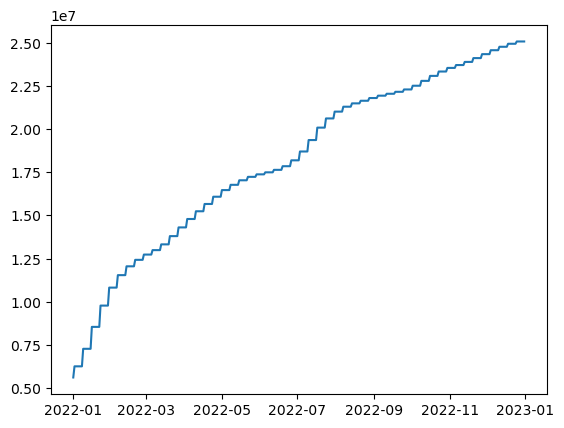

In [11]:
covid.loc[Italia]
import matplotlib.pyplot as plt
plt.plot(ita2022["date"], ita2022["total_cases"])

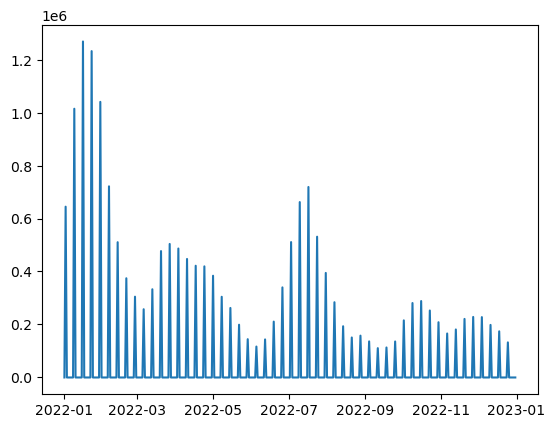

In [12]:
#II)
plt.plot(ita2022["date"],ita2022["new_cases"])

<Axes: >

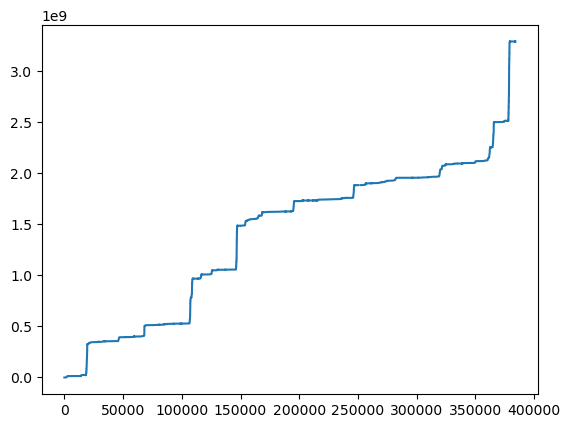

In [13]:
#III)
covid["progressivo"] = covid.new_cases.cumsum()
covid.progressivo.plot(kind="line")

#commento 5 - Dal grafico si vede che all'aumentare dei casi totali in Italia nel 2022 si ha un aumento della somma cumulativa dei nuovi casi nel 2022.

In [14]:
#6
FiltroITA=covid.location=="Italy"
FiltroFRA=covid.location=="France"
FiltroGerm=covid.location=="Germany"
Filtro3Nazioni = FiltroITA | FiltroFRA | FiltroGerm
filtro6 = covid[Filtro3Nazioni &  ((covid.date.dt.year == 2022) & (covid.date.dt.month >= 5) | (covid.date.dt.year == 2023) & (covid.date.dt.month <= 4))]

<Axes: xlabel='icu_patients', ylabel='location'>

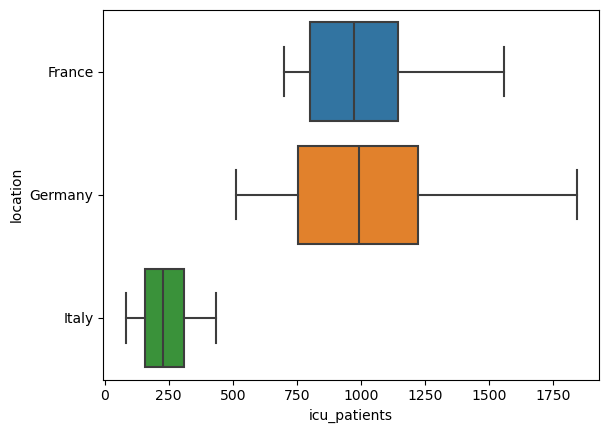

In [15]:
sns.boxplot (data=filtro6, x="icu_patients", y="location")

#commento 6 - Dal grafico si può notare che l'Italia ha avuto un minor numero pazienti in terapia intensiva nel periodo selezionato rispetto agli altri paesi (Francia e Germania) che hanno avuto un andamento quasi uguale, ma che in termini assoluti la Germania ha avuto più pazienti in terapia intensiva.

In [17]:
#7
FiltroSpa=covid.location=="Spain"
Filtro4Naz = FiltroITA | FiltroFRA | FiltroGerm | FiltroSpa
Anno23 = covid.date.dt.year == 2023
Filtro4Naz2023 = Filtro4Naz & Anno23
#somma valori nulli in hosp_patients
covid.loc[Filtro4Naz2023, 'hosp_patients'].isna().sum()

843

In [18]:
#somma valori nulli tot in hosp_patients
covid["hosp_patients"].isna().sum()

343889

In [19]:
Ita23 = FiltroITA & Anno23
Fra23 = FiltroFRA & Anno23
Ger23 = FiltroGerm & Anno23
Spa23 = FiltroSpa & Anno23

In [20]:
covid.loc[Ita23, 'hosp_patients'].sum()

1175272.0

In [21]:
covid.loc[Fra23, 'hosp_patients'].sum()

1382574.0

In [23]:
covid.loc[Ger23, 'hosp_patients'].sum()

0.0

In [22]:
covid.loc[Spa23, 'hosp_patients'].sum()

354602.0

#commento 7 - Delle interrogazioni effettuate sul db "covid" si potrebbe sostituire i dati nulli con il valore 0.